In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

In [3]:
df = pd.read_csv('/content/insomniaa.csv')
df.head(30)

,alcohol,coffee,stress,age,sleep_pills,sleep_hrs,insomnia
0,1,1,1,60,1,1,1
1,1,1,0,40,0,2,1
2,0,1,1,80,1,3,1
3,0,0,1,50,1,4,1
4,1,0,1,40,1,5,1
5,1,1,0,30,0,6,1
6,1,0,0,30,0,7,1
7,0,0,0,20,0,8,0
8,0,0,1,10,0,8,0
9,1,0,1,20,0,6,1


In [4]:
df.shape

(13, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   alcohol      13 non-null     int64
 1   coffee       13 non-null     int64
 2   stress       13 non-null     int64
 3   age          13 non-null     int64
 4   sleep_pills  13 non-null     int64
 5   sleep_hrs    13 non-null     int64
 6   insomnia     13 non-null     int64
dtypes: int64(7)
memory usage: 856.0 bytes


In [6]:
df.describe()

,alcohol,coffee,stress,age,sleep_pills,sleep_hrs,insomnia
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.538462,0.538462,0.461538,36.923077,0.307692,5.384615,0.769231
std,0.518875,0.518875,0.518875,18.432135,0.480384,2.256046,0.438529
min,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,30.000000,0.000000,4.000000,1.000000
50%,1.000000,1.000000,0.000000,30.000000,0.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,40.000000,1.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,80.000000,1.000000,8.000000,1.000000


In [7]:
df.isnull().sum()

alcohol        0
coffee         0
stress         0
age            0
sleep_pills    0
sleep_hrs      0
insomnia       0
dtype: int64

In [8]:
df['insomnia'].value_counts()

1    10
0     3
Name: insomnia, dtype: int64

In [9]:
df['insomnia'].value_counts()/df.shape[0]*100

1    76.923077
0    23.076923
Name: insomnia, dtype: float64

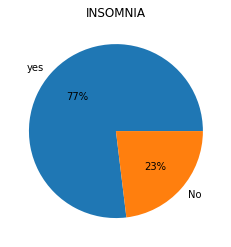

In [10]:
labels = ['yes', 'No']
values = df['insomnia'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('INSOMNIA')
plt.show()

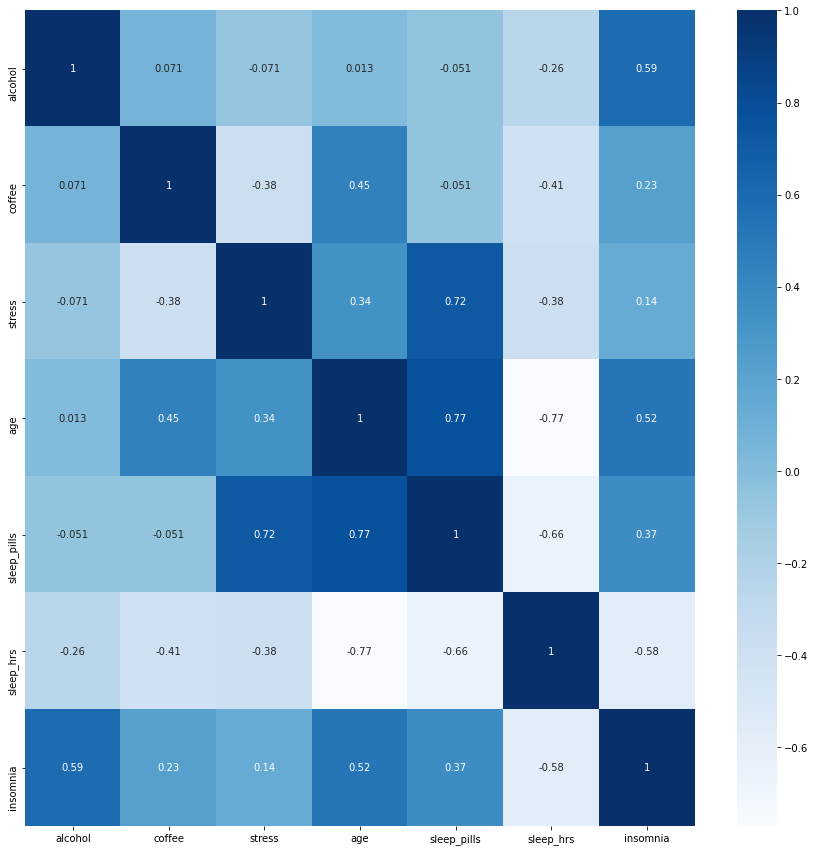

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

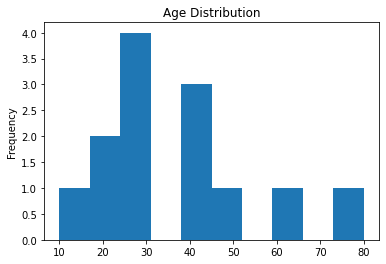

In [12]:
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [13]:
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  10
Max age:  80
Average age:  36.92307692307692


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2595: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning:

invalid value encountered in true_divide



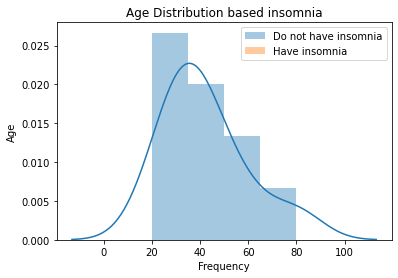

In [16]:
# Display age distribution based on insomnia
sns.distplot(df[df['insomnia'] == 1]['age'], label='Do not have insomnia')
sns.distplot(df[df['insomnia'] == 2]['age'], label = 'Have insomnia')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based insomnia')
plt.legend()
plt.show()

In [17]:
# Get min, max and average of the age of the people do not have insomnia
print('Min age of people who do not have insomnia: ', min(df[df['insomnia'] == 1]['age']))
print('Max age of people who do not have insomnia: ', max(df[df['insomnia'] == 1]['age']))
print('Average age of people who do not have insomnia: ', df[df['insomnia'] == 1]['age'].mean())

Min age of people who do not have insomnia:  20
Max age of people who do not have insomnia:  80
Average age of people who do not have insomnia:  42.0


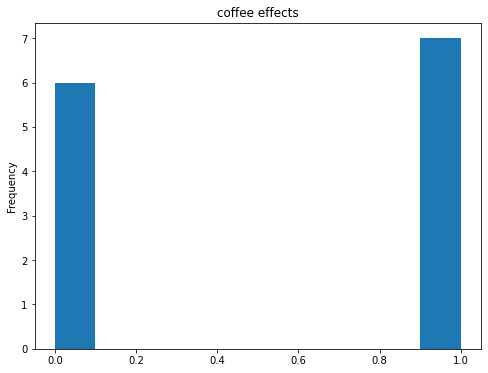

In [18]:
df['coffee'].plot(kind = 'hist', title = 'coffee effects', figsize = (8, 6))
plt.show()

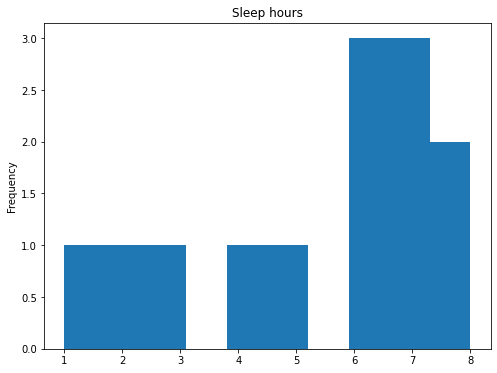

In [19]:
df['sleep_hrs'].plot(kind = 'hist', title = 'Sleep hours', figsize = (8, 6))
plt.show()

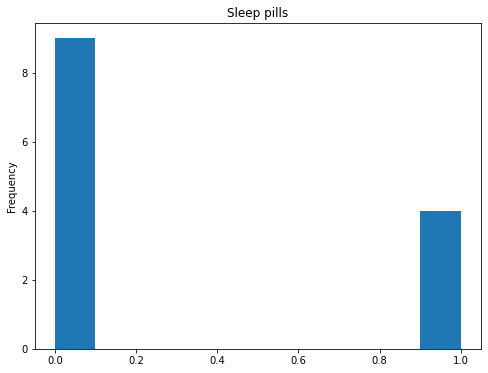

In [20]:
df['sleep_pills'].plot(kind = 'hist', title = 'Sleep pills', figsize = (8, 6))
plt.show()

In [21]:
target = df['insomnia']
features = df.drop(['insomnia'], axis = 1)

In [22]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [23]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [24]:
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [25]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


confusion_matrix :
[[3]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


confusion_matrix :
[[3]]

-----

AdaBoostClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25    

Feature: alcohol, Score: 0.11147
Feature: coffee, Score: 0.03279
Feature: stress, Score: 0.06259
Feature: age, Score: 0.20501
Feature: sleep_pills, Score: 0.03948
Feature: sleep_hrs, Score: 0.54865


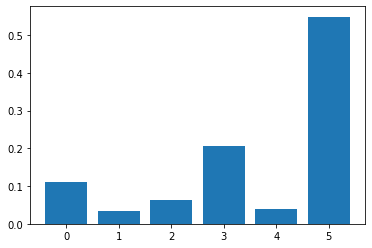

In [34]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [35]:
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)